<a href="https://colab.research.google.com/github/ASandyarani/Daiognasis/blob/main/medical_daiog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install dependencies (optional, in case cv2 is missing)
!pip install opencv-python-headless

# Step 2: Import Libraries
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/dataset/chest_xray/train'
val_dir   = '/content/drive/MyDrive/dataset/chest_xray/val'


In [ ]:
print("Train folder contains:", os.listdir(train_dir))
print("Val folder contains:", os.listdir(val_dir))


Train folder contains: ['NORMAL', 'PNEUMONIA']
Val folder contains: ['PNEUMONIA', 'NORMAL']


In [ ]:
# Step 4: Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 887 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
# Step 5: Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 6: Train the Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 1.0000 - loss: 1.5046e-34 - val_accuracy: 0.5000 - val_loss: 80.4160
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 80.4660
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 80.4689
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 1.0000 - loss: 3.5323e-38 - val_accuracy: 0.5000 - val_loss: 80.4689
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 1.0000 - loss: 5.7320e-28 - val_accuracy: 0.5000 - val_loss: 80.4689
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 1.0000 - loss: 3.2397e-34 - val_accuracy: 0.5000 - val_loss: 80.4689
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 1.0000 - loss: 2.1112e-37 - val_accuracy: 0.5000 - val_loss: 80.4689
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 1.0000 - loss: 1.1783

In [ ]:
loss, acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {acc:.2f}")
print(f"Validation Loss: {loss:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step - accuracy: 0.5000 - loss: 80.4689
Validation Accuracy: 0.50
Validation Loss: 80.47


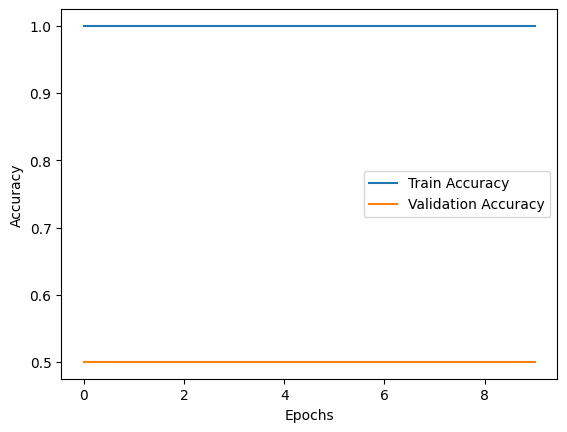

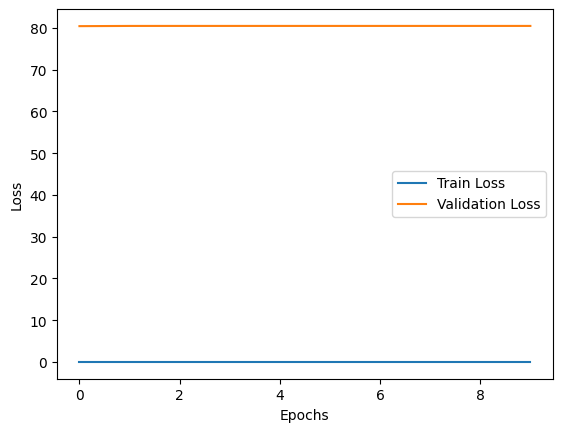

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [35]:
from google.colab import files
uploaded = files.upload()

# Get the uploaded filename
import os
img_path = list(uploaded.keys())[0]


Saving NORMAL2-IM-0370-0001.jpeg to NORMAL2-IM-0370-0001.jpeg


In [36]:
img = load_img(img_path, target_size=(150,150))


In [37]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

# Load and preprocess the uploaded image
img = load_img(img_path, target_size=(150,150))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)


In [38]:
prediction = model.predict(img_array)

# Assuming binary classification
print("Prediction:", "Positive" if prediction[0][0] > 0.5 else "Negative")
print("Prediction value:", prediction[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction: Negative
Prediction value: 0.0


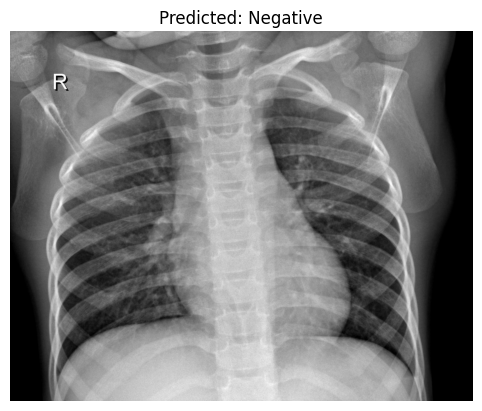

In [39]:
import matplotlib.pyplot as plt

plt.imshow(load_img(img_path))
plt.title("Predicted: " + ("Positive" if prediction[0][0] > 0.5 else "Negative"))
plt.axis("off")
plt.show()
